In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/sukanyade/Downloads/housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Check for missing values:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#Convert ocean_proximity to numeric since the other features are nemeric:
df['ocean_proximity'].value_counts()
mappings = {"<1H OCEAN" : 1 , "INLAND" : 2 , "NEAR OCEAN" : 3,  "ISLAND" : 4, "NEAR BAY" : 5}
df = df.replace({'ocean_proximity' : mappings})
print(df.head())




   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                5  
1      2401.0      1138.0         8.3014            358500.0                5  
2       496.0       177.0         7.2574            352100.0                5  
3       558.0       219.0         5.6431            341300.0                5  
4       565.0       259.0         3.8462            342200.0                5  


In [7]:
#Total Bedroom has missing values. Filling it with median values of the feature:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
iter_imputer = IterativeImputer()
housing_imputed = iter_imputer.fit_transform(df)
housing_imputed = pd.DataFrame(housing_imputed , columns = df.columns)

In [8]:
# Running a simple validation to check if the replacement function is valid for the data 
df1 = housing_imputed[housing_imputed['total_rooms'] < housing_imputed['total_bedrooms']]
print(df1.head())

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


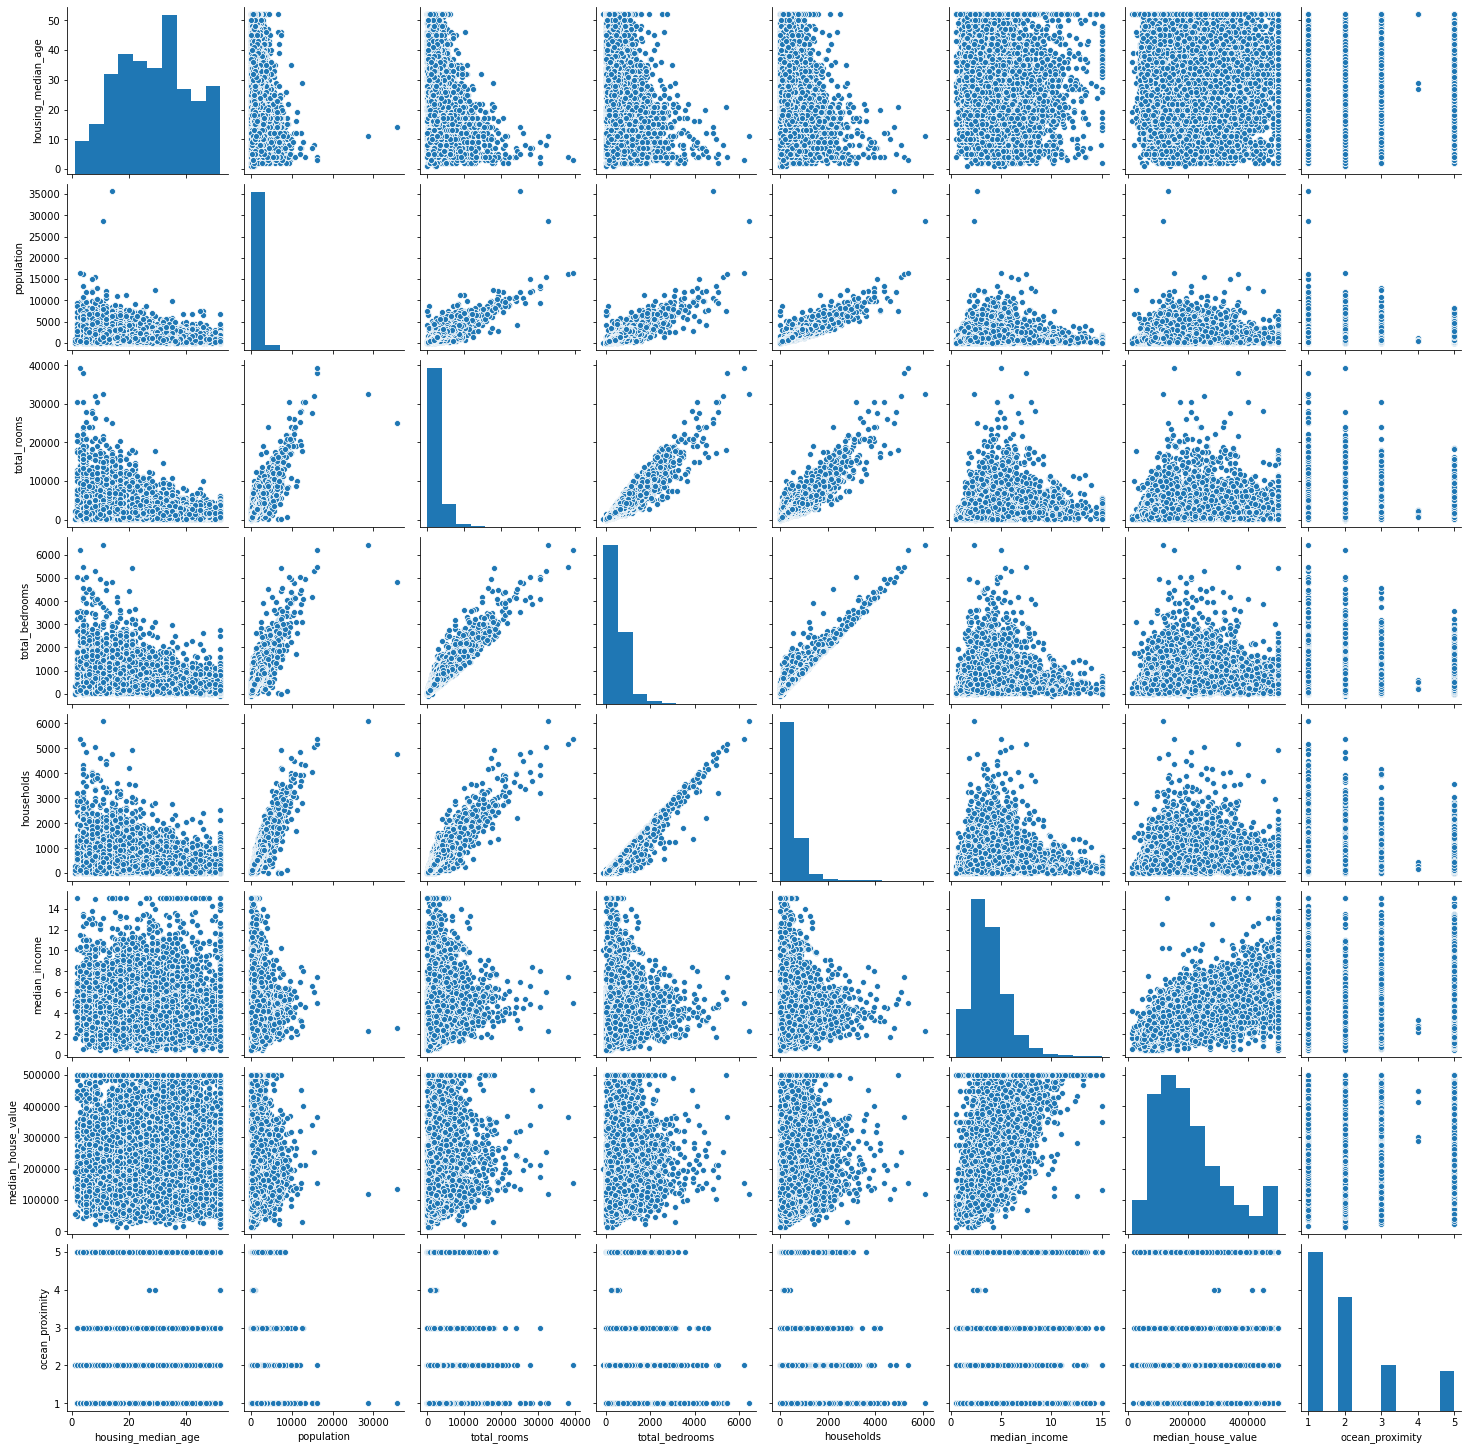

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#Pairplot to find the corelation between the features:
sns.pairplot(housing_imputed, vars = ['housing_median_age' , 'population' , 'total_rooms' , 'total_bedrooms' , 'households'  ,'median_income' , 'median_house_value' ,'ocean_proximity'  ])

In [10]:
# The graph shows that Population, Total_Bedrooms, Household and total_Rooms are highly corelated
#Creating new features to check for their corelations:

housing_imputed['rooms_per_household'] = housing_imputed['total_rooms']/housing_imputed['households']
housing_imputed['bedroom_per_room'] = housing_imputed['total_bedrooms']/housing_imputed['total_rooms']
housing_imputed['population_per_household'] = housing_imputed['population']/housing_imputed['households']

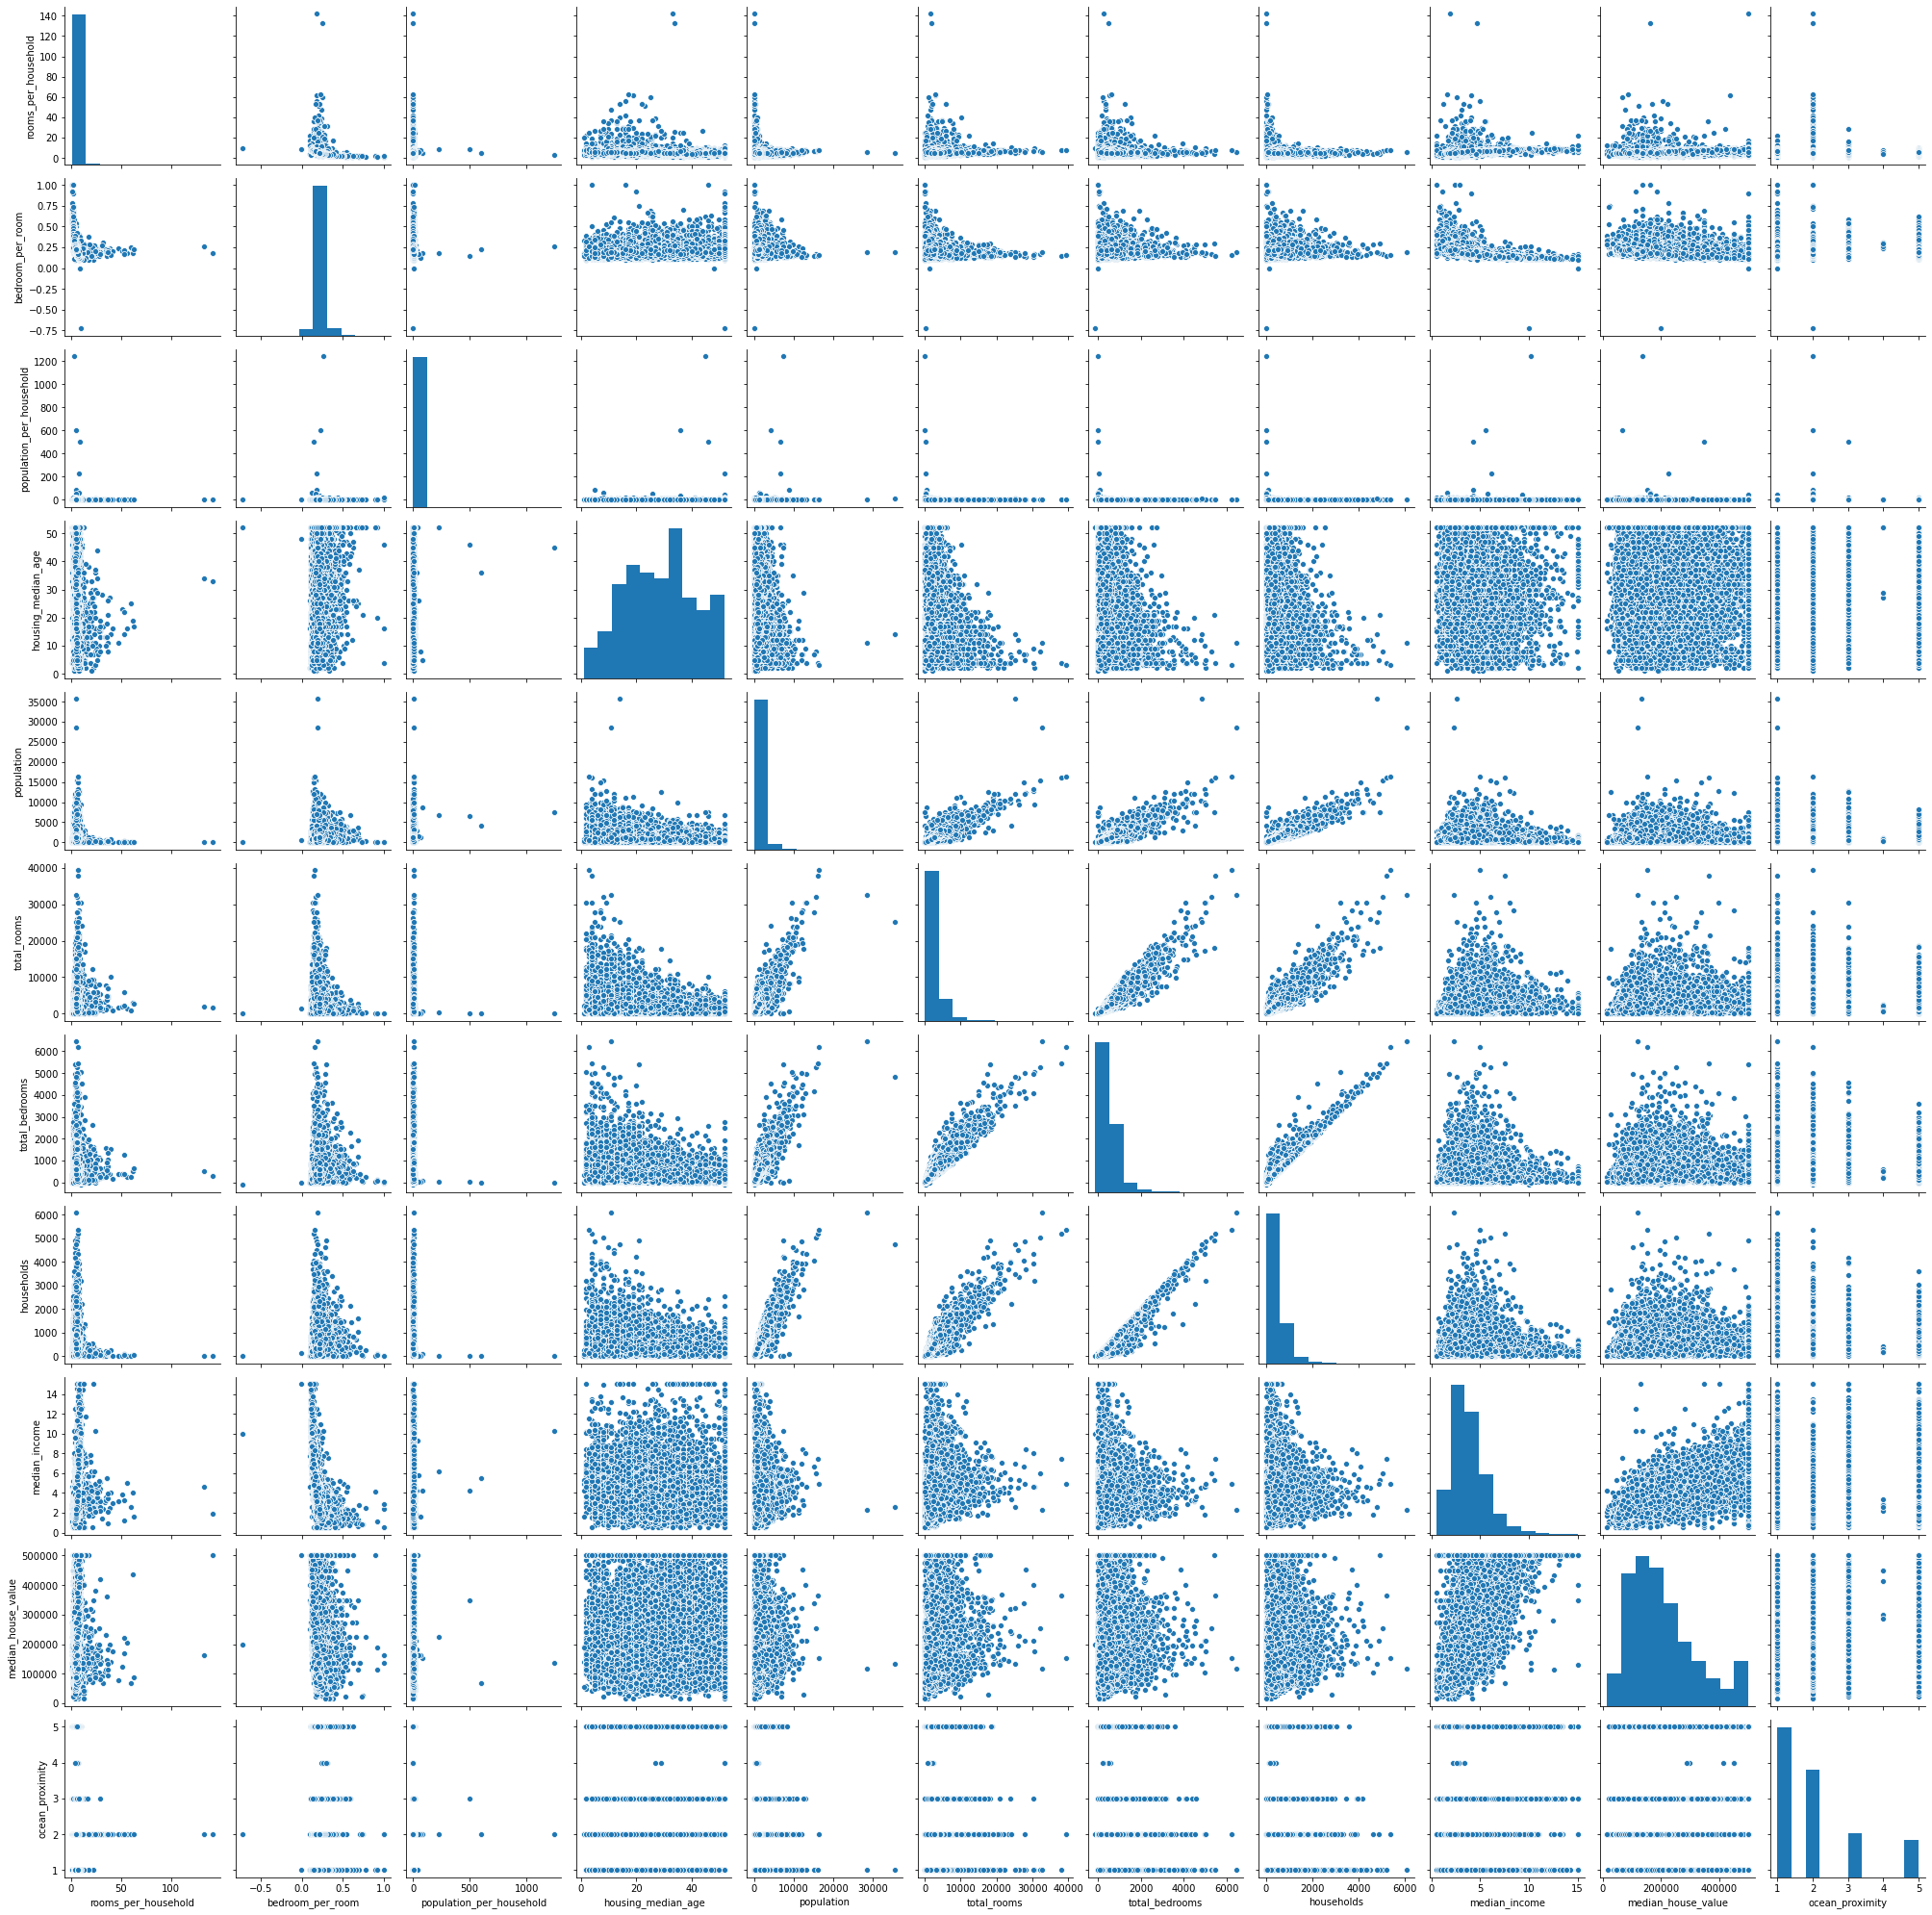

In [11]:
sns.pairplot(housing_imputed, vars = ['rooms_per_household' , 'bedroom_per_room' , 'population_per_household' , 'housing_median_age' , 'population' , 'total_rooms' , 'total_bedrooms' , 'households'  ,'median_income' , 'median_house_value' ,'ocean_proximity'  ])

In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression

x = housing_imputed.drop('median_house_value' , axis=1)
y = housing_imputed['median_house_value']

xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size = .20 , random_state=10)
pipe = Pipeline((
("it" , IterativeImputer(estimator = LinearRegression())),
    ("pt" , PowerTransformer()),
    ("sc" , StandardScaler()),
    ("lr" , LinearRegression()),
))
pipe.fit(xtrain, ytrain)
print(pipe.score(xtrain, ytrain))
print(pipe.score(xtest , ytest))

0.6279670461643478
0.6223216221342116


In [13]:
#Using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
x = housing_imputed.drop('median_house_value' , axis=1)
y = housing_imputed['median_house_value']

xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size = .20 , random_state=10)
pipe = Pipeline((
("it" , IterativeImputer(estimator = LinearRegression())),
    ("pt" , PowerTransformer()),
    ("sc" , StandardScaler()),
    ("lr" , DecisionTreeRegressor()),
))
pipe.fit(xtrain, ytrain)
print(pipe.score(xtrain, ytrain))
print(pipe.score(xtest , ytest))


1.0
0.6205654740330333


In [14]:
#RandomForestModel
from sklearn.ensemble import RandomForestRegressor
x = housing_imputed.drop('median_house_value' , axis=1)
y = housing_imputed['median_house_value']

xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size = .20 , random_state=10)
pipe = Pipeline((
("it" , IterativeImputer(estimator = LinearRegression())),
    ("pt" , PowerTransformer()),
    ("sc" , StandardScaler()),
    ("lr" , RandomForestRegressor()),
))
pipe.fit(xtrain, ytrain)
print(pipe.score(xtrain, ytrain))
print(pipe.score(xtest , ytest))


0.973087295087503
0.8063617387951907


In [16]:
#RandomForestModel has the best score.
# Calculate cross validation score for the RandomForestModel

from sklearn.model_selection import cross_val_score
score_rf = cross_val_score(pipe, xtrain, ytrain, cv=5, scoring='r2'
                          )
print(score_rf)

/Users/sukanyade/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/sukanyade/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/sukanyade/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[0.80462417 0.77217859 0.76929737 0.79852129 0.76534766]


In [17]:
#Estimate Confidence Interval
import scipy.stats as stats
n=50
xbar= np.mean(score_rf)
s = np.std(score_rf)
se = s/np.sqrt(n)
stats.t.interval(0.95, df= n-1, loc=xbar, scale=se)

(0.7773762982089586, 0.7866113331229513)